
## STAGE 1: PREPROCESS
---

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install tensorflow
!pip install statsmodels


In [72]:
import pandas as pd
df = pd.read_csv('API_EN.GHG.CH4.ZG.AR5_DS2_en_csv_v2_16952.csv')
df.head(2)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,Methane (CH4) emissions (total) excluding LULU...,EN.GHG.CH4.ZG.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,53.881279,54.794521,55.707763,57.534247,57.990868,58.447489,59.817352,60.273973,NaN,NaN
1,Africa Eastern and Southern,AFE,Methane (CH4) emissions (total) excluding LULU...,EN.GHG.CH4.ZG.AR5,NaN,NaN,NaN,NaN,NaN,NaN,...,77.035766,78.409653,80.589944,83.465065,88.515800,90.880621,92.790928,94.976190,NaN,NaN


## STAGE 2: MODELS
---

### LINEAR

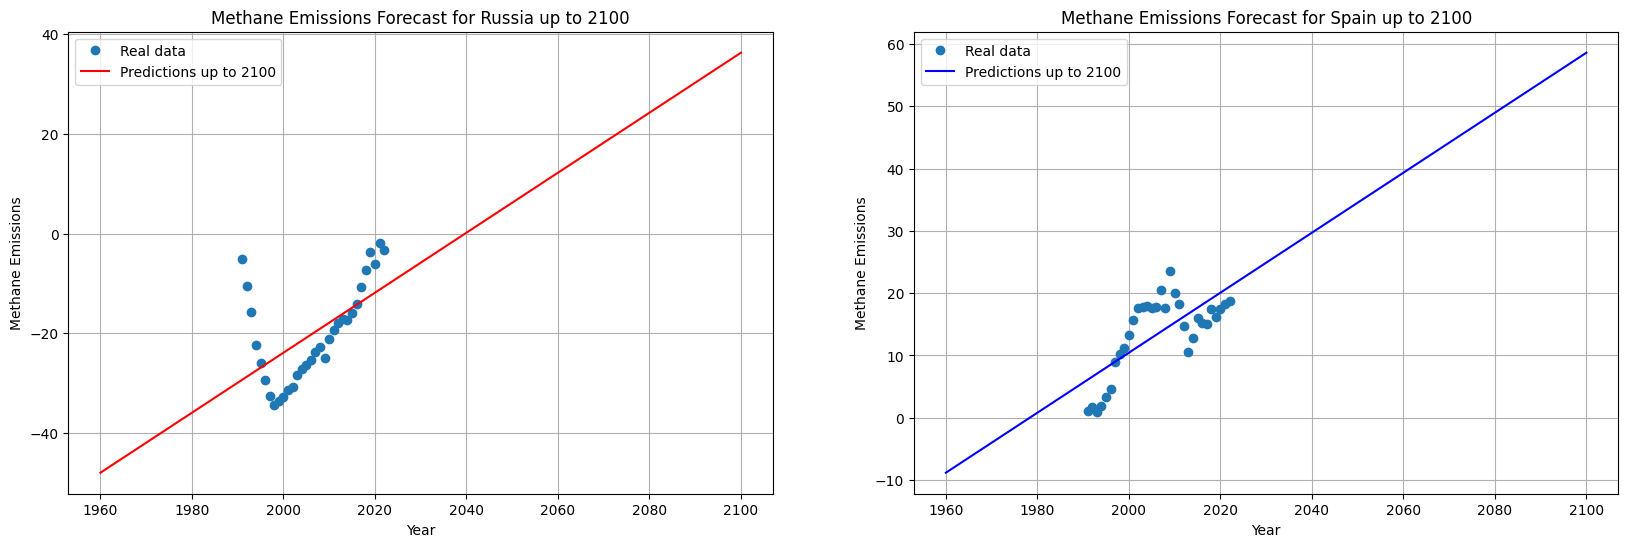

In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming 'df' DataFrame is already loaded
# Filter data for 'Russian Federation' and 'Spain'
Y = df[df['Country Name'] == 'Russian Federation']
S = df[df['Country Name'] == 'Spain']

# Remove unnecessary columns and rows with NaN
Y = Y.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
Y.columns = ['Emissions']      # Rename column
Y = Y.dropna()                 # Drop NaN values
Y = Y[Y['Emissions'] != 0]     # Drop zero values

S = S.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
S.columns = ['Emissions']      # Rename column
S = S.dropna()                 # Drop NaN values
S = S[S['Emissions'] != 0]     # Drop zero values

# Transform data for linear regression
X = Y.index.astype(int).values.reshape(-1, 1)  # Convert years to numerical format
y = Y['Emissions'].values

# Initialize and train linear regression model
model = LinearRegression()
model.fit(X, y)

# Forecast for years up to 2100
future_years = np.arange(1960, 2101).reshape(-1, 1)
predictions = model.predict(future_years)

# Save forecast for years from 2000 to 2100
pred_save = model.predict(np.arange(2000, 2100).reshape(-1, 1))
with open('ch4_ru.txt', 'w') as file:
    for year, pred in enumerate(pred_save):
        file.write(str(year+2000)+' '+str(float(pred))+'\n')
np.savetxt('ch4_ru.npy', pred_save)

# Prepare data for Spain
XS = S.index.astype(int).values.reshape(-1, 1)  # Convert years to numerical format
s = S['Emissions'].values

# Initialize and train linear regression model
model = LinearRegression()
model.fit(XS, s)

# Forecast for years up to 2100
predictionsS = model.predict(future_years)

# Save forecast for years from 2000 to 2100
pred_saveS = model.predict(np.arange(2000, 2100).reshape(-1, 1))
with open('ch4_es.txt', 'w') as file:
    for year, pred in enumerate(pred_saveS):
        file.write(str(year+2000)+' '+str(float(pred))+'\n')
np.savetxt('ch4_es.npy', pred_saveS)

# Visualization

# Create a window with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Left plot — current forecast up to 2100
axs[0].plot(X, y, 'o', label='Real data')
axs[0].plot(future_years, predictions, label='Predictions up to 2100', color='red')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Methane Emissions')
axs[0].set_title('Methane Emissions Forecast for Russia up to 2100')
axs[0].legend()
axs[0].grid()

# Right plot — new forecast based on Spain data (pred_saveS, XS, and s)
axs[1].plot(XS, s, 'o', label='Real data')
axs[1].plot(future_years, predictionsS, label='Predictions up to 2100', color='blue')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Methane Emissions')
axs[1].set_title('Methane Emissions Forecast for Spain up to 2100')
axs[1].legend()
axs[1].grid()

plt.show()


### POLY

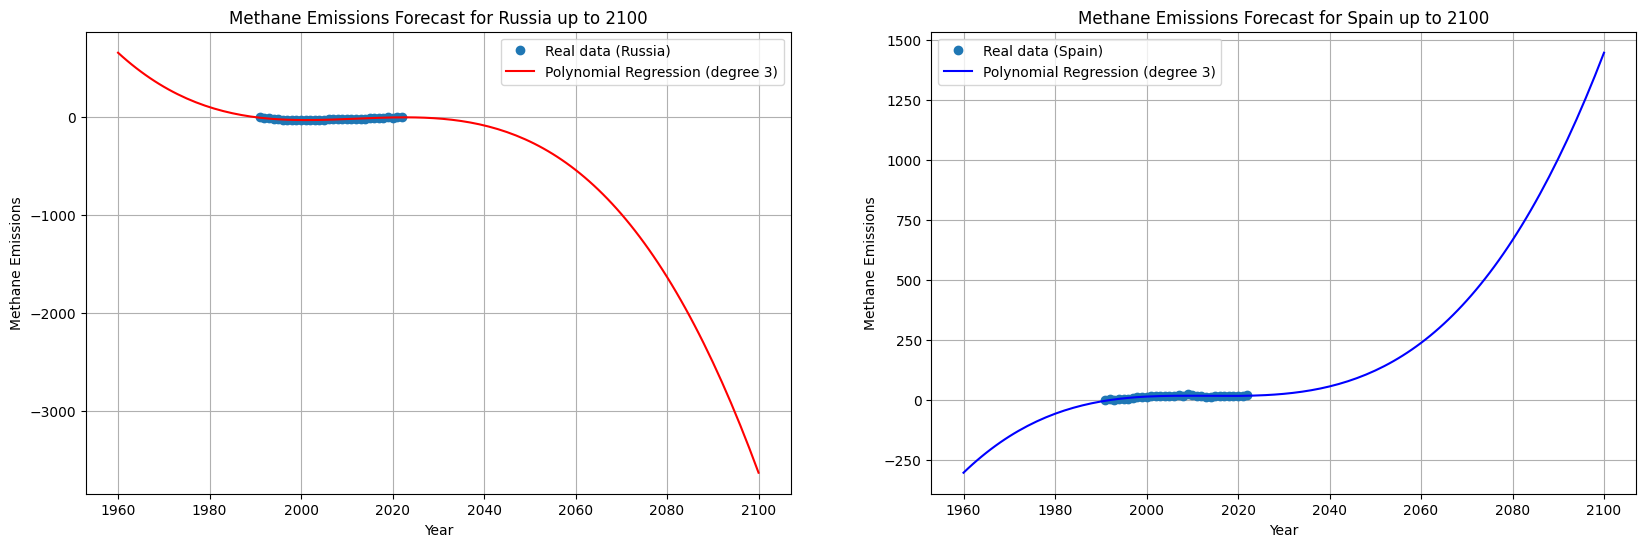

In [65]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Assuming the DataFrame 'df' is already loaded
# Filter data for 'Russian Federation'
Y = df[df['Country Name'] == 'Russian Federation']
Y = Y.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
Y.columns = ['Emissions']      # Rename column
Y = Y.dropna()                 # Drop NaN values

# Prepare data for Russia
X = Y.index.astype(int).values.reshape(-1, 1)  # Convert years to numerical format
y = Y['Emissions'].values

# Set up polynomial regression (degree can be varied, e.g., 3)
poly = PolynomialFeatures(degree=3)  # Try a 3rd-degree polynomial
X_poly = poly.fit_transform(X)

# Train the model
model = LinearRegression()
model.fit(X_poly, y)

# Forecast up to the year 2100
future_years = np.arange(1960, 2101).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
predictions_russia = model.predict(future_years_poly)

# Now add data for Spain
S = df[df['Country Name'] == 'Spain']
S = S.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
S.columns = ['Emissions']      # Rename column
S = S.dropna()                 # Drop NaN values

# Prepare data for Spain
XS = S.index.astype(int).values.reshape(-1, 1)
s = S['Emissions'].values

# Set up polynomial regression for Spain
poly_s = PolynomialFeatures(degree=3)
XS_poly = poly_s.fit_transform(XS)

# Train the model for Spain
model_s = LinearRegression()
model_s.fit(XS_poly, s)

# Forecast up to the year 2100 for Spain
future_years_poly_s = poly_s.transform(future_years)
predictions_spain = model_s.predict(future_years_poly_s)

# Visualization
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot for Russia
axs[0].plot(X, y, 'o', label='Real data (Russia)')
axs[0].plot(future_years, predictions_russia, label='Polynomial Regression (degree 3)', color='red')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Methane Emissions')
axs[0].set_title('Methane Emissions Forecast for Russia up to 2100')
axs[0].legend()
axs[0].grid()

# Plot for Spain
axs[1].plot(XS, s, 'o', label='Real data (Spain)')
axs[1].plot(future_years, predictions_spain, label='Polynomial Regression (degree 3)', color='blue')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Methane Emissions')
axs[1].set_title('Methane Emissions Forecast for Spain up to 2100')
axs[1].legend()
axs[1].grid()

plt.show()


### LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Data preparation for Russia
data_russia = Y['Emissions'].values.reshape(-1, 1)  # Russian data
scaler_russia = MinMaxScaler(feature_range=(0, 1))
data_scaled_russia = scaler_russia.fit_transform(data_russia)

# Data preparation for Spain
data_spain = S['Emissions'].values.reshape(-1, 1)  # Spanish data
scaler_spain = MinMaxScaler(feature_range=(0, 1))
data_scaled_spain = scaler_spain.fit_transform(data_spain)

# Create training sequences for Russia
X_train_russia, y_train_russia = [], []
sequence_length = 5
for i in range(sequence_length, len(data_scaled_russia)):
    X_train_russia.append(data_scaled_russia[i-sequence_length:i, 0])
    y_train_russia.append(data_scaled_russia[i, 0])

X_train_russia, y_train_russia = np.array(X_train_russia), np.array(y_train_russia)
X_train_russia = np.reshape(X_train_russia, (X_train_russia.shape[0], X_train_russia.shape[1], 1))

# Create training sequences for Spain
X_train_spain, y_train_spain = [], []
for i in range(sequence_length, len(data_scaled_spain)):
    X_train_spain.append(data_scaled_spain[i-sequence_length:i, 0])
    y_train_spain.append(data_scaled_spain[i, 0])

X_train_spain, y_train_spain = np.array(X_train_spain), np.array(y_train_spain)
X_train_spain = np.reshape(X_train_spain, (X_train_spain.shape[0], X_train_spain.shape[1], 1))

# Model definition for Russia
model_russia = Sequential()
model_russia.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_russia.shape[1], 1)))
model_russia.add(LSTM(units=50))
model_russia.add(Dense(units=1))

# Model definition for Spain
model_spain = Sequential()
model_spain.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_spain.shape[1], 1)))
model_spain.add(LSTM(units=50))
model_spain.add(Dense(units=1))

# Compilation and training for Russia
model_russia.compile(optimizer='adam', loss='mean_squared_error')
model_russia.fit(X_train_russia, y_train_russia, epochs=100, batch_size=1, verbose=1)

# Compilation and training for Spain
model_spain.compile(optimizer='adam', loss='mean_squared_error')
model_spain.fit(X_train_spain, y_train_spain, epochs=100, batch_size=1, verbose=1)

# Prediction and inverse transformation for Russia
predicted_russia = model_russia.predict(X_train_russia)
predicted_russia = scaler_russia.inverse_transform(predicted_russia)

# Prediction and inverse transformation for Spain
predicted_spain = model_spain.predict(X_train_spain)
predicted_spain = scaler_spain.inverse_transform(predicted_spain)




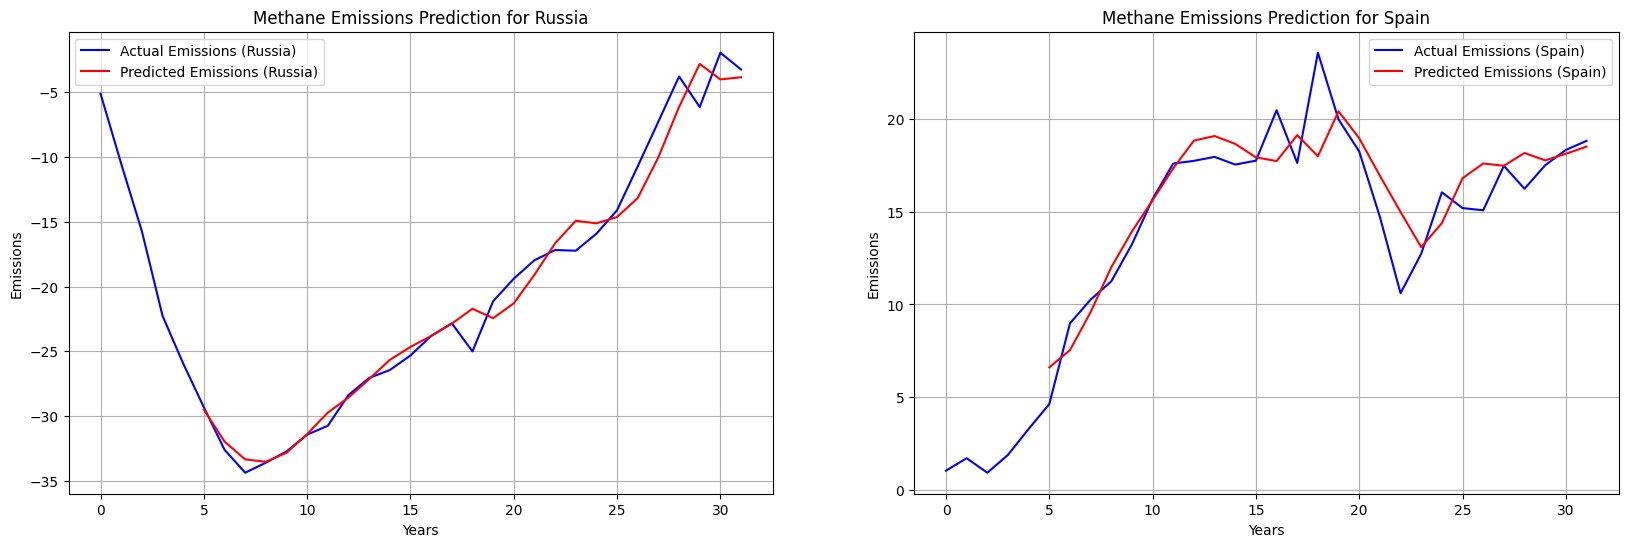

In [74]:
# Visualization
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot for Russia
axs[0].plot(data_russia, color='blue', label='Actual Emissions (Russia)')
axs[0].plot(np.arange(sequence_length, len(predicted_russia) + sequence_length), predicted_russia, color='red', label='Predicted Emissions (Russia)')
axs[0].set_xlabel('Years')
axs[0].set_ylabel('Emissions')
axs[0].set_title('Methane Emissions Prediction for Russia')
axs[0].legend()
axs[0].grid()

# Plot for Spain
axs[1].plot(data_spain, color='blue', label='Actual Emissions (Spain)')
axs[1].plot(np.arange(sequence_length, len(predicted_spain) + sequence_length), predicted_spain, color='red', label='Predicted Emissions (Spain)')
axs[1].set_xlabel('Years')
axs[1].set_ylabel('Emissions')
axs[1].set_title('Methane Emissions Prediction for Spain')
axs[1].legend()
axs[1].grid()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize sequence with the latest known data for Russia
forecast_years = 2100 - 2022  # Number of years to forecast
input_seq_russia = data_scaled_russia[-sequence_length:]  # Last 5 points for initialization

# Recursive forecast for Russia
predictions_russia = []
for _ in range(forecast_years):
    pred = model_russia.predict(input_seq_russia.reshape(1, sequence_length, 1))
    predictions_russia.append(pred[0, 0])
    input_seq_russia = np.append(input_seq_russia[1:], pred, axis=0)  # Update sequence

# Inverse scaling of predictions for Russia
predictions_russia = scaler_russia.inverse_transform(np.array(predictions_russia).reshape(-1, 1))

# Initialize sequence with the latest known data for Spain
input_seq_spain = data_scaled_spain[-sequence_length:]  # Last 5 points for initialization

# Recursive forecast for Spain
predictions_spain = []
for _ in range(forecast_years):
    pred = model_spain.predict(input_seq_spain.reshape(1, sequence_length, 1))
    predictions_spain.append(pred[0, 0])
    input_seq_spain = np.append(input_seq_spain[1:], pred, axis=0)  # Update sequence

# Inverse scaling of predictions for Spain
predictions_spain = scaler_spain.inverse_transform(np.array(predictions_spain).reshape(-1, 1))






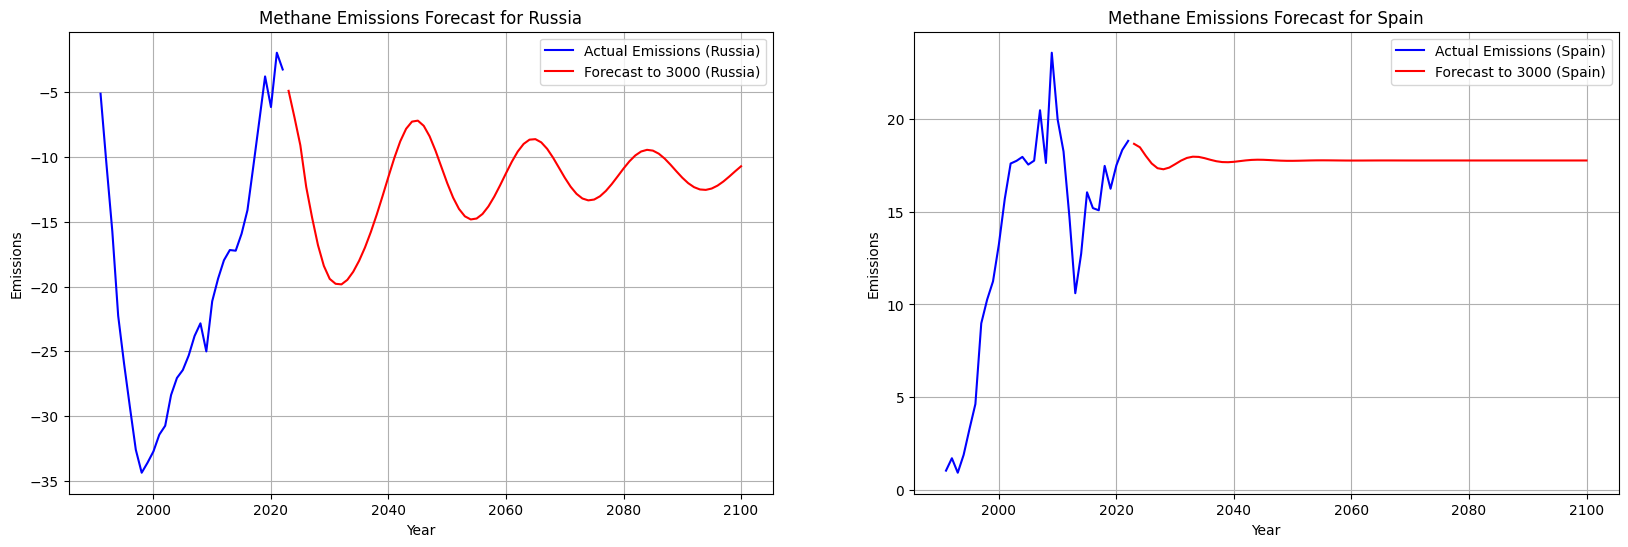

In [79]:
# Visualization of forecast up to 3000 for Russia and Spain
years = np.arange(1991, 2023 + forecast_years)
all_data_russia = np.concatenate((data_russia, predictions_russia))
all_data_spain = np.concatenate((data_spain, predictions_spain))
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot for Russia
axs[0].plot(years[:len(data_russia)], data_russia, color='blue', label='Actual Emissions (Russia)')
axs[0].plot(years[len(data_russia):], predictions_russia, color='red', label='Forecast to 3000 (Russia)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Emissions')
axs[0].set_title('Methane Emissions Forecast for Russia')
axs[0].legend()
axs[0].grid()

# Plot for Spain
axs[1].plot(years[:len(data_spain)], data_spain, color='blue', label='Actual Emissions (Spain)')
axs[1].plot(years[len(data_spain):], predictions_spain, color='red', label='Forecast to 3000 (Spain)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Emissions')
axs[1].set_title('Methane Emissions Forecast for Spain')
axs[1].legend()
axs[1].grid()

plt.show()

### TIME SERIES: ARIMA 

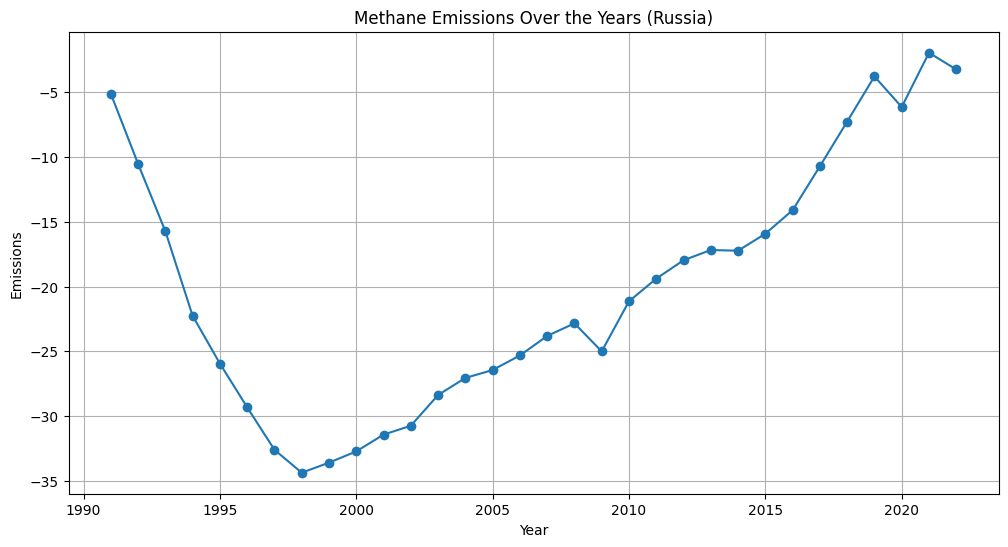

ADF Statistic (Russia): 2.8862421526461994
p-value (Russia): 1.0


/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/t

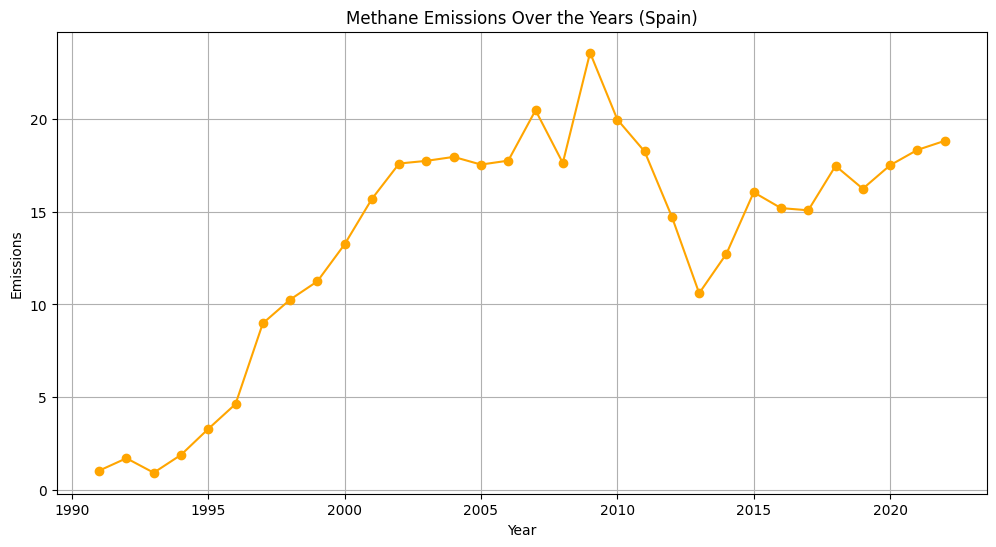

ADF Statistic (Spain): -1.8959182851097967
p-value (Spain): 0.33398370794415133


/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/t

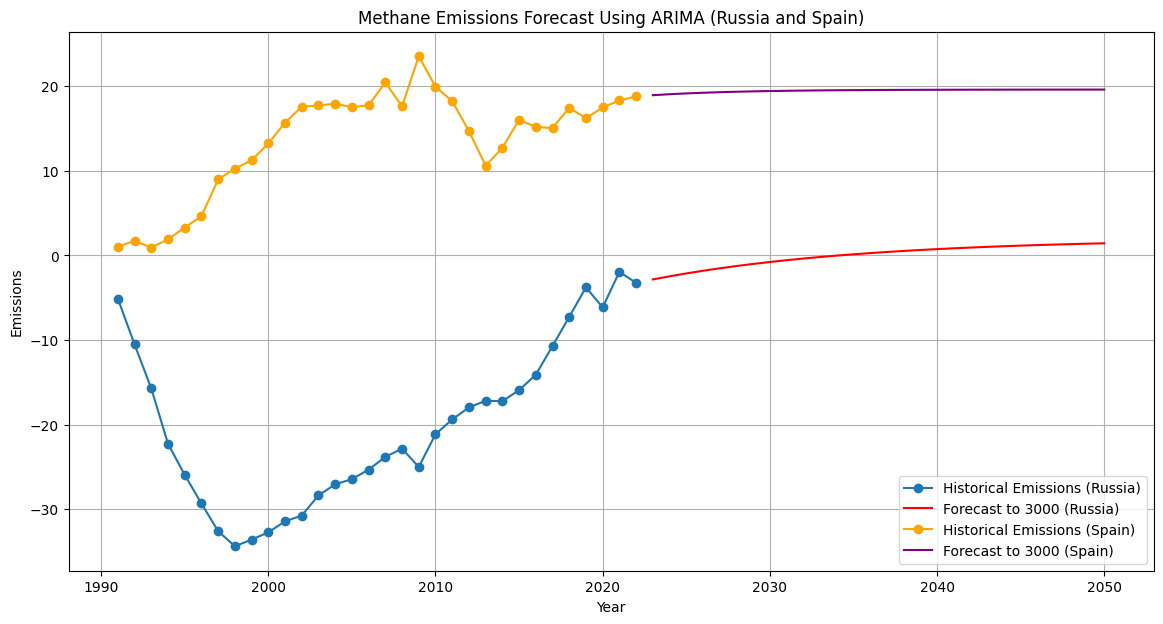

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


Y = df[df['Country Name'] == 'Russian Federation']
Y = Y.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
Y.columns = ['Emissions']      # Rename column
Y = Y.dropna()                 # Drop NaN values
data_russia = Y['Emissions'].values


S = df[df['Country Name'] == 'Spain']
S = S.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
S.columns = ['Emissions']      # Rename column
S = S.dropna()                 # Drop NaN values
data_spain = S['Emissions'].values

# Prepare data for Russia
years = np.arange(1991, 2023)
df_russia = pd.Series(data_russia, index=years)

# Visualization of historical data for Russia
plt.figure(figsize=(12, 6))
plt.plot(df_russia, marker='o', label='Russia')
plt.title('Methane Emissions Over the Years (Russia)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.grid()
plt.show()

# Stationarity test for Russia
result_russia = adfuller(df_russia)
print('ADF Statistic (Russia):', result_russia[0])
print('p-value (Russia):', result_russia[1])

# Differencing data if necessary
if result_russia[1] > 0.05:
    df_russia_diff = df_russia.diff().dropna()
else:
    df_russia_diff = df_russia

# ARIMA model setup for Russia
model_russia = ARIMA(df_russia, order=(1, 1, 1))
model_fit_russia = model_russia.fit()

# Forecast for Russia
forecast_russia = model_fit_russia.forecast(steps=2050 - 2022)  # Forecast until 3000

# Prepare data for Spain
df_spain = pd.Series(data_spain, index=years)

# Visualization of historical data for Spain
plt.figure(figsize=(12, 6))
plt.plot(df_spain, marker='o', color='orange', label='Spain')
plt.title('Methane Emissions Over the Years (Spain)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.grid()
plt.show()

# Stationarity test for Spain
result_spain = adfuller(df_spain)
print('ADF Statistic (Spain):', result_spain[0])
print('p-value (Spain):', result_spain[1])

# Differencing data if necessary for Spain
if result_spain[1] > 0.05:
    df_spain_diff = df_spain.diff().dropna()
else:
    df_spain_diff = df_spain

# ARIMA model setup for Spain
model_spain = ARIMA(df_spain, order=(1, 1, 1))
model_fit_spain = model_spain.fit()

# Forecast for Spain
forecast_spain = model_fit_spain.forecast(steps=2050 - 2022)  # Forecast until 3000

# Visualization of forecasts for both Russia and Spain
forecast_years = np.arange(2023, 2051)
plt.figure(figsize=(14, 7))

# Plot for Russia
plt.plot(df_russia, label='Historical Emissions (Russia)', marker='o')
plt.plot(forecast_years, forecast_russia, label='Forecast to 3000 (Russia)', color='red')

# Plot for Spain
plt.plot(df_spain, label='Historical Emissions (Spain)', marker='o', color='orange')
plt.plot(forecast_years, forecast_spain, label='Forecast to 3000 (Spain)', color='purple')

plt.title('Methane Emissions Forecast Using ARIMA (Russia and Spain)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid()
plt.show()


### TIME SERIES: ETS


/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/black_flame/PROJETCS/VKR/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index wa

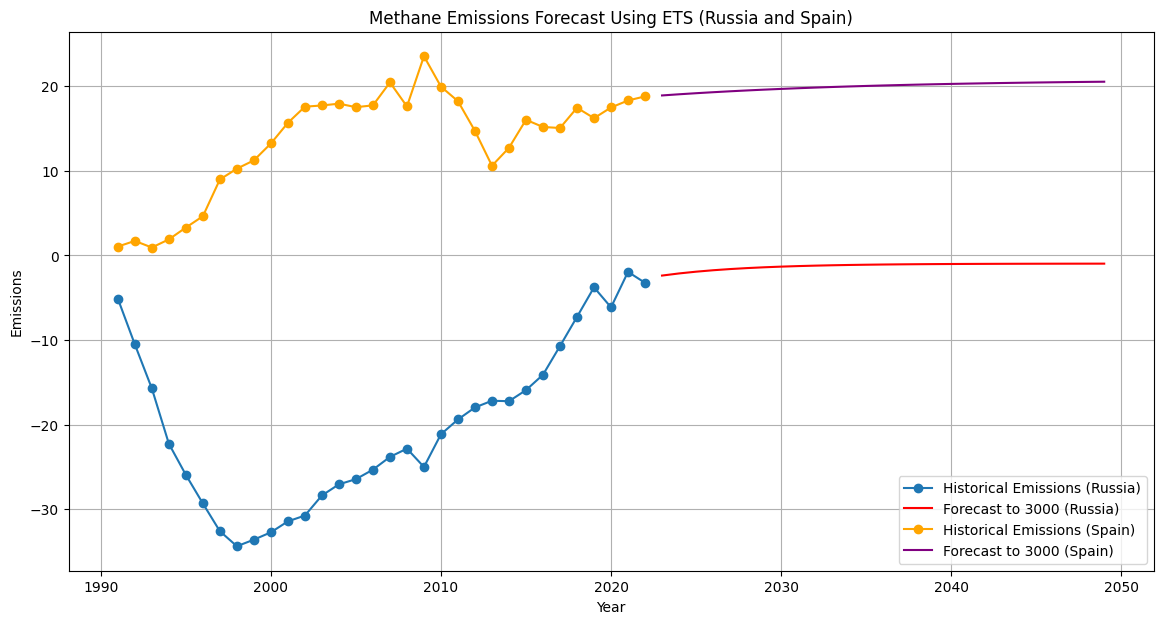

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare data for Russia
years = np.arange(1991, 2023)
df_russia = pd.Series(data_russia, index=years)

# Create and fit ETS model for Russia
model_russia = ExponentialSmoothing(df_russia, trend='add', seasonal=None, damped_trend=True)
model_fit_russia = model_russia.fit()

# Forecast for Russia until 3000
forecast_years = np.arange(2023, 2050)
forecast_russia = model_fit_russia.forecast(len(forecast_years))

# Prepare data for Spain
df_spain = pd.Series(data_spain, index=years)

# Create and fit ETS model for Spain
model_spain = ExponentialSmoothing(df_spain, trend='add', seasonal=None, damped_trend=True)
model_fit_spain = model_spain.fit()

# Forecast for Spain until 3000
forecast_spain = model_fit_spain.forecast(len(forecast_years))

# Visualization of results for both Russia and Spain
plt.figure(figsize=(14, 7))

# Plot for Russia
plt.plot(df_russia, label='Historical Emissions (Russia)', marker='o')
plt.plot(forecast_years, forecast_russia, label='Forecast to 3000 (Russia)', color='red')

# Plot for Spain
plt.plot(df_spain, label='Historical Emissions (Spain)', marker='o', color='orange')
plt.plot(forecast_years, forecast_spain, label='Forecast to 3000 (Spain)', color='purple')

plt.title('Methane Emissions Forecast Using ETS (Russia and Spain)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid()
plt.show()


### NN: GRU

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Prepare data for Russia
years = np.arange(1991, 2023)


Y = df[df['Country Name'] == 'Russian Federation']
Y = Y.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
Y.columns = ['Emissions']      # Rename column
Y = Y.dropna()                 # Drop NaN values
data_russia = Y['Emissions'].values


S = df[df['Country Name'] == 'Spain']
S = S.loc[:, '1960':'2022'].T  # Select only years and transpose for convenience
S.columns = ['Emissions']      # Rename column
S = S.dropna()                 # Drop NaN values
data_spain = S['Emissions'].values


df_russia = pd.Series(data_russia, index=years)

# Normalize data for Russia
scaler_russia = MinMaxScaler(feature_range=(0, 1))
data_normalized_russia = scaler_russia.fit_transform(df_russia.values.reshape(-1, 1))

# Create sequences for Russia
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 5  # sequence length for Russia
X_russia, y_russia = create_sequences(data_normalized_russia, seq_length)

# Build GRU model for Russia
model_russia = Sequential()
model_russia.add(GRU(64, input_shape=(seq_length, 1), return_sequences=False))
model_russia.add(Dense(1))
model_russia.compile(optimizer='adam', loss='mse')

# Train model for Russia
model_russia.fit(X_russia, y_russia, epochs=100, batch_size=4)

# Forecast for Russia
future_steps = 2100 - 2022  # forecast years for Russia
predictions_russia = data_normalized_russia[-seq_length:]  # initial data for forecast
forecast_russia = []

for _ in range(future_steps):
    pred_input_russia = predictions_russia[-seq_length:].reshape(1, seq_length, 1)
    pred_russia = model_russia.predict(pred_input_russia)
    predictions_russia = np.append(predictions_russia, pred_russia)
    forecast_russia.append(pred_russia[0][0])

# Inverse transform forecast for Russia
forecast_russia = scaler_russia.inverse_transform(np.array(forecast_russia).reshape(-1, 1))

# Prepare data for Spain
df_spain = pd.Series(data_spain, index=years)

# Normalize data for Spain
scaler_spain = MinMaxScaler(feature_range=(0, 1))
data_normalized_spain = scaler_spain.fit_transform(df_spain.values.reshape(-1, 1))

# Create sequences for Spain
X_spain, y_spain = create_sequences(data_normalized_spain, seq_length)

# Build GRU model for Spain
model_spain = Sequential()
model_spain.add(GRU(64, input_shape=(seq_length, 1), return_sequences=False))
model_spain.add(Dense(1))
model_spain.compile(optimizer='adam', loss='mse')

# Train model for Spain
model_spain.fit(X_spain, y_spain, epochs=100, batch_size=4)

# Forecast for Spain
predictions_spain = data_normalized_spain[-seq_length:]  # initial data for forecast
forecast_spain = []

for _ in range(future_steps):
    pred_input_spain = predictions_spain[-seq_length:].reshape(1, seq_length, 1)
    pred_spain = model_spain.predict(pred_input_spain)
    predictions_spain = np.append(predictions_spain, pred_spain)
    forecast_spain.append(pred_spain[0][0])

# Inverse transform forecast for Spain
forecast_spain = scaler_spain.inverse_transform(np.array(forecast_spain).reshape(-1, 1))


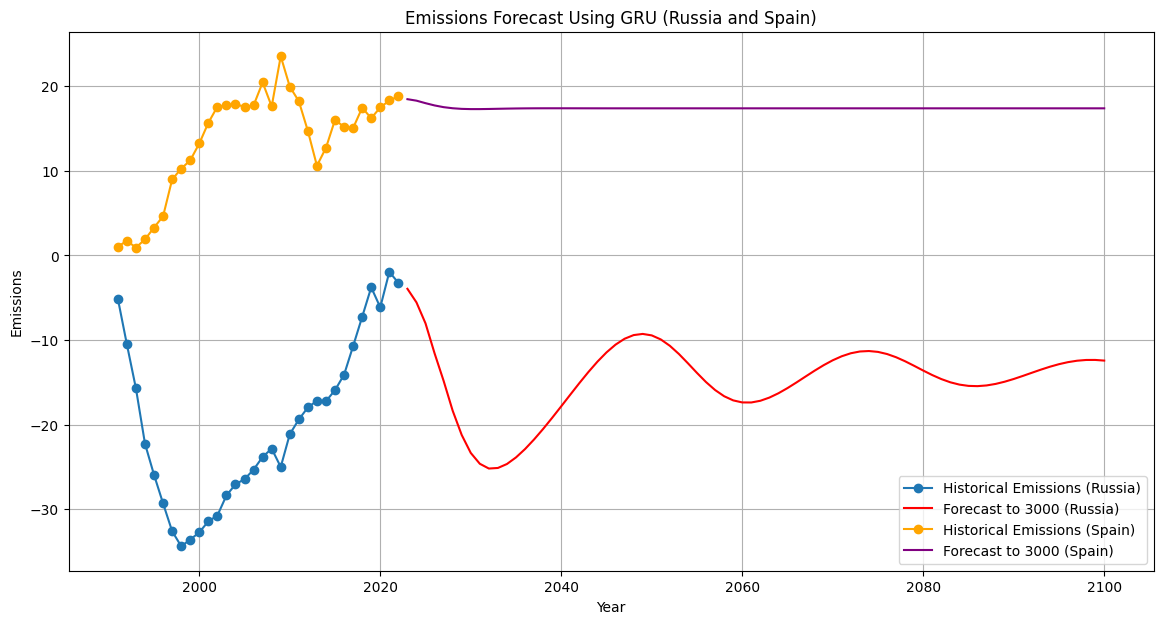

In [82]:

# Visualization of results for both Russia and Spain
plt.figure(figsize=(14, 7))

# Plot for Russia
plt.plot(df_russia, label='Historical Emissions (Russia)', marker='o')
future_years = np.arange(2023, 2101)
plt.plot(future_years, forecast_russia, label='Forecast to 3000 (Russia)', color='red')

# Plot for Spain
plt.plot(df_spain, label='Historical Emissions (Spain)', marker='o', color='orange')
plt.plot(future_years, forecast_spain, label='Forecast to 3000 (Spain)', color='purple')

plt.title('Emissions Forecast Using GRU (Russia and Spain)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid()
plt.show()


In [44]:
### add transformers! 